## Financial Report Generation RAG

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
# LLAMAPARSE_API_KEY = os.getenv("LLAMAPARSE_API_KEY")


# print(f"LLAMAPARSE_API_KEY: {LLAMAPARSE_API_KEY}")


In [4]:
GEMINI_API_KEY = os.getenv("GOOGLE_API_KEY")
# print(f"GEMINI_API_KEY: {GEMINI_API_KEY}")

In [5]:
import chromadb
from llama_index.llms.gemini import Gemini
from llama_index.embeddings.ollama import OllamaEmbedding
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import VectorStoreIndex, StorageContext
from llama_index.core import Settings
from copy import deepcopy
from llama_index.core.schema import TextNode

c:\Users\aviji\miniconda3\envs\lamaidx\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
from llama_index.core import SimpleDirectoryReader

In [7]:
documents = SimpleDirectoryReader("./data").load_data()

In [8]:
embed_model = OllamaEmbedding(model_name="nomic-embed-text")
llm = Gemini(api_key=GEMINI_API_KEY, model_name="models/gemini-2.0-flash")

In [9]:
chroma_client = chromadb.PersistentClient(path="./chroma_db")
chroma_collection = chroma_client.get_or_create_collection("financial_collection")

In [10]:
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)


In [11]:
# vector_index = VectorStoreIndex.from_documents(documents=documents, storage_context=storage_context, embed_model=embed_model)

In [12]:
vector_index = VectorStoreIndex.from_vector_store(
    vector_store=vector_store, embed_model=embed_model
)

In [13]:
def get_page_nodes(docs, separator="\n---\n"):
    """Split each document into page node, by separator."""
    nodes = []
    for doc in docs:
        doc_chunks = doc.text.split(separator)
        for doc_chunk in doc_chunks:
            node = TextNode(
                text=doc_chunk,
                metadata=deepcopy(doc.metadata),
            )
            nodes.append(node)

    return nodes

In [14]:
file_path = "./data/Motorsport_Games_Financial_report.pdf"

In [15]:
len(documents)

38

In [16]:
page_nodes = get_page_nodes(documents)

In [17]:
from llama_index.llms.ollama import Ollama

In [18]:
query_engine = vector_index.as_query_engine(llm=llm, similarity_top_k=5)

In [19]:
response = query_engine.query("what is the revenue of on 2022 Year Ended December 31?")

print(str(response))

The revenue for the year ended December 31, 2022, was $10,324,559.



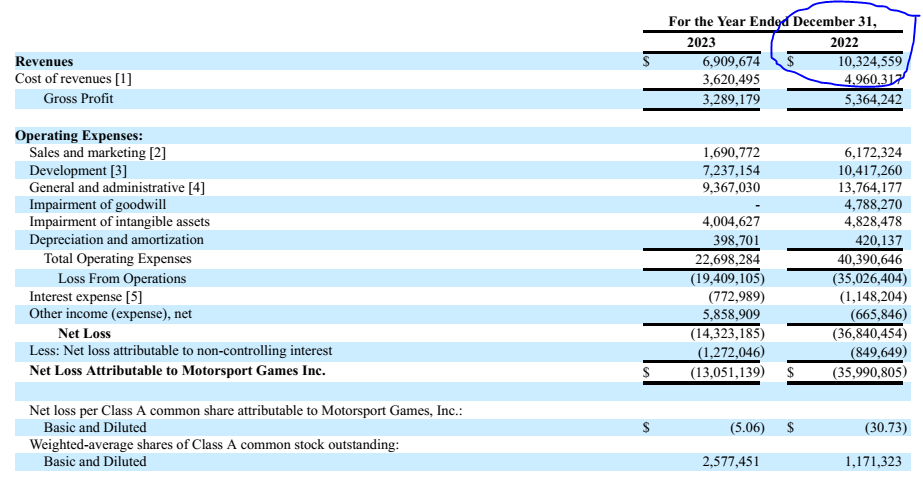

In [20]:
response = query_engine.query(
    "what is the Net Loss Attributable to Motossport Games Inc. on 2022 Year Ended December 31?"
)

print(str(response))

The Net Loss Attributable to Motorsport Games Inc. for the Year Ended December 31, 2022, was $35,935,507.



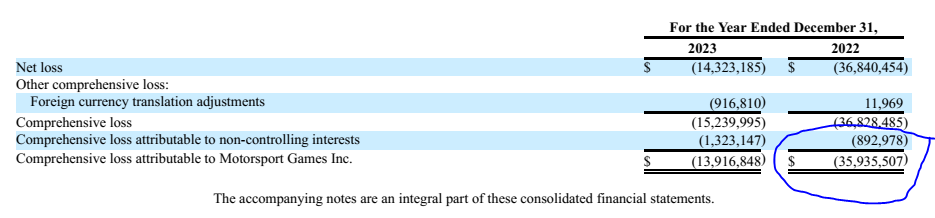

In [21]:
response = query_engine.query(
    "What are the Liquidity and Going concern for the Company on December 31, 2023"
)

print(str(response))

The lack of available cash to fund operations over the next year has raised substantial doubt about the Company’s ability to continue as a going concern. If the Company cannot satisfy its capital requirements, it would likely need to dissolve and liquidate its assets under bankruptcy laws or otherwise. The consolidated financial statements do not include any adjustments that might result from this uncertainty and have been prepared on a basis that assumes the Company will continue as a going concern.



In [22]:
response = query_engine.query(
    "What was revenues on Gaming for the Year Ended on December 31?"
)

print(str(response))

I am sorry, but the context provided does not contain the revenues on Gaming for the Year Ended on December 31.



In [23]:
response = query_engine.query(
    "Summarise the Principal versus agent considerations of the company?"
)

print(str(response))

The company evaluates sales to end customers of its full games and related content via third-party storefronts, including digital storefronts such as Microsoft’s Xbox Store, Sony’s PlayStation Store, Nintendo’s eShop, Apple’s App Store, and Google’s Play Store, to determine whether the Company is acting as the principal or agent in the sale to the end customer. Key indicators that the Company evaluates in determining gross versus net treatment include the underlying contract terms and conditions between the various parties to the transaction, which party is primarily responsible for fulfilling the promise to provide the specified good or service to the end customer, which party has inventory risk before the specified good or service has been transferred to the end customer, and which party has discretion in establishing the price for the specified good or service. The company determined that, apart from contracts with customers where revenue is generated via the Apple’s App Store or Go

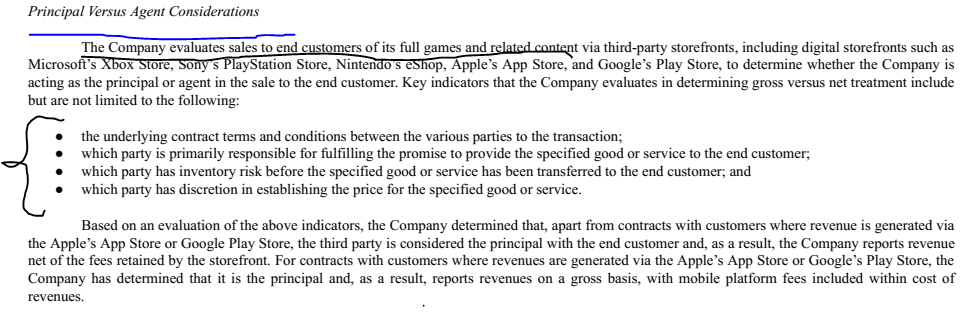

In [24]:
response = query_engine.query(
    "Summarise the Net Loss Per Common Share of the company with financial data?"
)

print(str(response))

Basic net loss per common share is calculated by dividing net loss by the weighted average number of common shares outstanding during the period. Diluted net loss per common share is calculated by dividing net loss by the weighted average number of common and dilutive common-equivalent shares outstanding during each period. Dilutive common-equivalent shares consist of shares of options and warrants, if not anti-dilutive.

The following shares were excluded from the calculation of weighted average dilutive common shares because their inclusion would have been anti-dilutive for 2023 and 2022 respectively: stock options (74,765 and 77,253) and warrants (33,574 and 0).



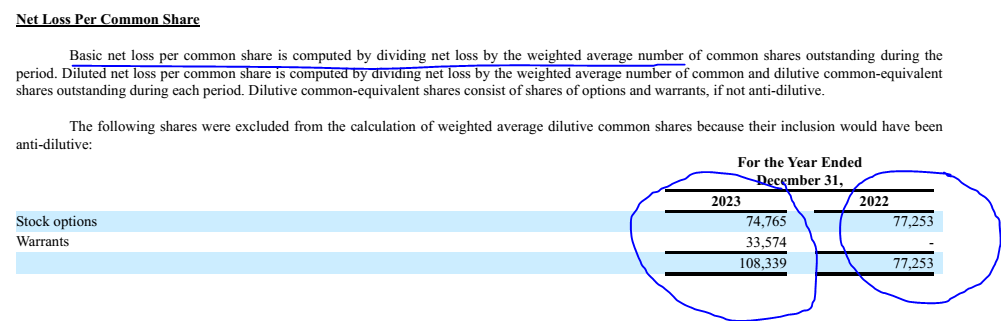

In [25]:
response = query_engine.query(
    "Summarise Property and equipment consist of the following balances as of December 31, 2023 and 2022 of the company with financial data?"
)

print(str(response))

As of December 31, 2023, property and equipment consisted of furniture and fixtures ($17,498), computer software and equipment ($784,355), and leasehold improvements ($160,606). The total was $962,459, less accumulated depreciation of ($714,766), resulting in net property and equipment of $247,693.

As of December 31, 2022, property and equipment consisted of furniture and fixtures ($17,450), computer software and equipment ($760,887), and leasehold improvements ($146,370). The total was $924,707, less accumulated depreciation of ($402,274), resulting in net property and equipment of $522,433.

Depreciation expense was $0.3 million for each of the years ended December 31, 2023 and 2022.



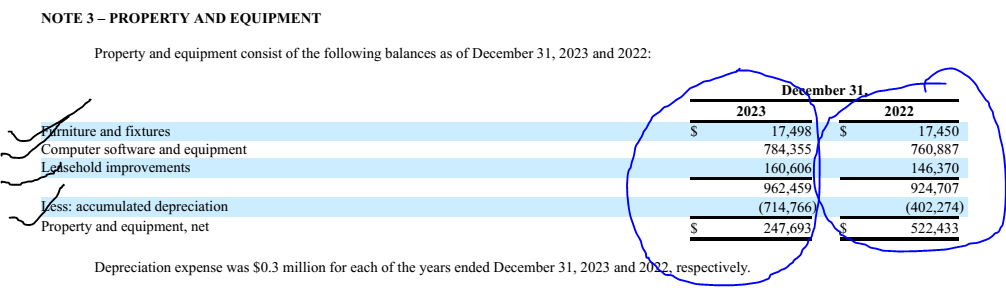

In [26]:
response = query_engine.query(
    "Summarise The Intangible Assets on December 21, 2023 of the company with financial data?"
)

print(str(response))

As of December 31, 2023, the balance of intangible assets was $5,685,271. This includes amortization expense of $1,892,466, impairment of ($148,668), disposals of ($1,157,342), and foreign currency translation adjustment of $41,767. Also, the company sold its NASCAR License to iRacing for $5.0 million with an additional (i) $0.5 million payable on the date that is 6 months following such closing and (ii) $0.5 million on the earlier of such date when all NASCAR Games have been removed. In accordance with this sale, the Company recognized a gain of $3.0 million which is included in other income on the consolidated statements of operations for the year ended December 31, 2023. The estimated aggregate amortization expense of intangible assets for the next five years and thereafter, excluding future amortization on non-amortizing finite-lived intangible assets of $1.7 million, is $4,077,099.



In [27]:
response = query_engine.query(
    "What are leases of the company with yearwise financial data?"
)

print(str(response))

The following are the maturities related to the company's lease liabilities as of December 31, 2023:

2024: $154,377
2025: $26,749
2026: $26,506
Total lease payments: $207,632
Less effects of imputed interest: $(8,958)
Present value of lease liabilities: $198,674



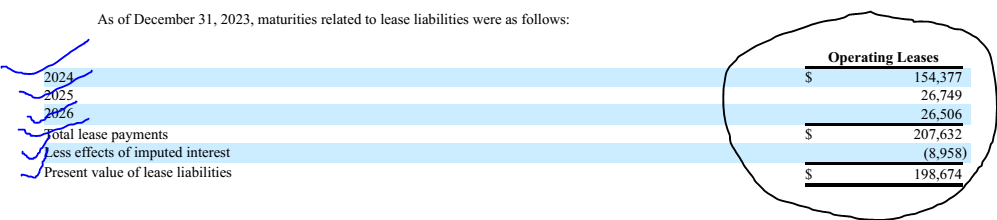

In [28]:
response = query_engine.query(
    "Plot chart of Accrued expenses and other liabilities using the financial data of the company"
)

print(str(response))

Here's a summary of accrued expenses and other liabilities for December 31, 2023 and 2022:

*   **Accrued royalties:** \$217,868 (2023), \$274,085 (2022)
*   **Accrued professional fees:** \$110,008 (2023), \$693,803 (2022)
*   **Accrued consulting fees:** \$0 (2023), \$26,667 (2022)
*   **Accrued development costs:** \$32,214 (2023), \$172,164 (2022)
*   **Esports prize money:** \$0 (2023), \$125,202 (2022)
*   **Accrued taxes:** \$40,000 (2023), \$149,842 (2022)
*   **Accrued payroll:** \$500,522 (2023), \$372,358 (2022)
*   **Deferred revenue:** \$270,845 (2023), \$311,945 (2022)
*   **Loss contingency reserve:** \$545,920 (2023), \$1,100,000 (2022)
*   **Accrued other:** \$173,938 (2023), \$190,358 (2022)
*   **Total:** \$1,891,315 (2023), \$3,416,424 (2022)


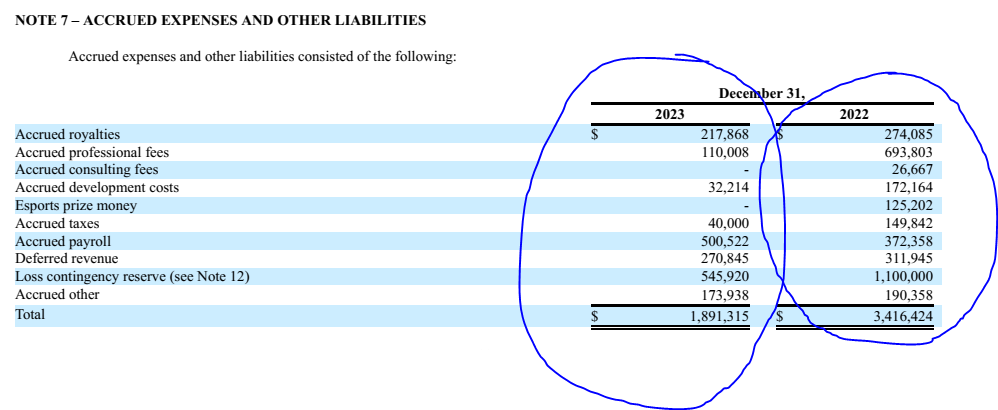

## Query using LLama3.2

In [29]:
local_llm = Ollama(model="llama3.2:1b", request_timeout=1000.0)
local_query_engine = vector_index.as_query_engine(llm=local_llm, similarity_top_k=3)

In [30]:
response = local_query_engine.query(
    "Plot chart of Accrued expenses and other liabilities using the financial data of the company"
)

print(str(response))

Chart: 

|  | Acquired Expenses | Other Liabilities |
| --- | --- | --- |
| 1. Accrued Expenses | $3,000,000 | $2,500,000 |
| 2. Short-term Loan Payable | ( $2,700,000 ) | ( $1,900,000 ) |

Explanation:
- The chart shows the allocation of Acquired Expenses and Other Liabilities for the year ended December 31, 2023.
- The total value of Acquired Expenses is $3,000,000, with a portion being short-term loan payable ($2,700,000).
- The total value of Other Liabilities is $4,100,000, comprising $2,500,000 for short-term loan payable and $1,600,000 as the principal amount of a short-term loan.


## Summary Index

In [31]:
import nest_asyncio

nest_asyncio.apply()

In [32]:
from llama_index.core import SummaryIndex

In [33]:
summary_index = SummaryIndex(nodes=page_nodes)

In [34]:
summary_query_engine = summary_index.as_query_engine(
    llm=llm, response_mode="tree_summarize", use_async=True
)

In [35]:
from llama_index.core.tools import QueryEngineTool

In [36]:
summary_tool = QueryEngineTool.from_defaults(
    query_engine=summary_query_engine,
    description=(
        "Useful for summarization questions related to Motorsport Games Company."
    ),
)

In [37]:
vector_tool = QueryEngineTool.from_defaults(
    query_engine=local_query_engine,
    description=(
        "Useful for retriving specific context from the Motorsport Games Company."
    ),
)

In [38]:
from llama_index.core.query_engine.router_query_engine import RouterQueryEngine
from llama_index.core.selectors import LLMSingleSelector

In [39]:
adv_query_engine = RouterQueryEngine(
    llm=llm,
    selector=LLMSingleSelector.from_defaults(llm=llm),
    query_engine_tools=[summary_tool, vector_tool],
    verbose=True,
)

In [40]:
response = adv_query_engine.query(
    "Summarize the charts describing the revenure of the company."
)
print(str(response))

Selecting query engine 0: The question asks to summarize charts describing revenue, which directly aligns with the purpose of choice (1) - 'Useful for summarization questions related to Motorsport Games Company.'.
Here's a summary of the revenue information:

The company generates revenue primarily through the sale of digital and physical video game titles, including extra content, mainly for console, PC, and mobile platforms. Additional revenues are generated through esports activities, including sponsorships and participation fees.

Revenue is recognized when control of the product is transferred to the customer and any underlying performance obligations have been satisfied. Revenues from product sales are recognized after deducting allowances for returns and price protection. In-game revenue is recognized when the customer obtains control of the in-game content. Sponsorship revenue is recognized over the period of time the company satisfies its performance obligation. Software devel

In [41]:
# response = adv_query_engine.query(
#     "What is the consolidated balance sheet of the company?"
# )
# print(str(response))

In [42]:
response = adv_query_engine.query("What is the Total Assets of the company Yearwise?")
print(str(response))

Selecting query engine 1: The question asks for a specific data point (Total Assets) for each year. This requires retrieving specific context from the Motorsport Games Company's financial reports or data, making option 2 the most relevant..
Based on the provided financial report data, the total assets of the company as of December 31, 2022, are $18,897,792.
